In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_theme();

#%matplotlib inline


In [2]:
production = pd.read_csv('Production_Crops_Livestock_E_All_Data.csv',encoding='latin-1')
prices = pd.read_csv('Prices_E_All_Data.csv',encoding='latin-1')
GDP = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4019678.csv',skiprows=4)
imports_gb = pd.read_csv('Trade_CropsLivestock_E_All_Data.csv',encoding='latin-1')



# CLEANING

In [3]:
production= production.rename(columns={"Area": "Country"})
imports_gb= imports_gb.rename(columns={"Area": "Country"})

production_milk=production[(production["Country"]=='Ireland') & (production["Item Code"]==1780) & (production["Element Code"]==5510)]
production_milk.head()
#filtered_df = df[(df['col1'] >= 1) & (df['col1'] <= 5)]


,Area Code,Country,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
26584,104,Ireland,1780,"Milk, Total",5510,Production,tonnes,2356000.0,2450800.0,2461100.0,...,5536680.0,5387770.0,5583670.0,5816220.0,6585120.0,6851430.0,7478160.0,7831250.0,8244870.0,8561470.0


In [4]:
cattle = production_milk.rename(columns={"Area": "Country"})
cattle=production[(production["Country"]=='Ireland') & (production["Item Code"]==866)]
cattle.head()

,Area Code,Country,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
26323,104,Ireland,866,Cattle,5111,Stocks,Head,4291200.0,4179200.0,4300600.0,...,6493000.0,6754100.0,6902600.0,6926100.0,6963500.0,7221200.0,7363498.0,6593490.0,6559650.0,6529440.0


In [5]:
prices = prices.rename(columns={"Area": "Country"})

prices=prices[(prices["Country"]=='Ireland') & (prices["Item Code"]==1780)]
prices.head()

,Area Code,Country,Item Code,Item,Element Code,Element,Months Code,Months,Unit,Y1991,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
38014,104,Ireland,1780,"Milk, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,NaN,80.0,...,86.0,Im,115.0,Im,116.0,Im,111.0,Im,NaN,NaN


In [6]:
GDP=GDP[(GDP["Country Name"]=='United Kingdom') | (GDP["Country Name"]=="Ireland")]
GDP = GDP.rename(columns={"Country Name": "Country"})

GDP.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
81,United Kingdom,GBR,GDP per capita (current US$),NY.GDP.PCAP.CD,1397.594803,1472.385714,1525.775853,1613.456884,1748.288118,1873.567774,...,43713.814124,47787.241298,45404.567773,41499.555703,40857.755583,43646.951971,43070.498360,41059.168809,NaN,NaN
111,Ireland,IRL,GDP per capita (current US$),NY.GDP.PCAP.CD,685.614712,739.276406,797.006288,852.135302,965.135423,1023.773726,...,51533.034565,55599.850800,62012.484926,62861.639116,69774.028972,79107.604993,80886.615739,85422.542868,NaN,NaN


In [7]:
imports_gb=imports_gb[(imports_gb["Item Code"]==886) | (imports_gb["Item Code"]==901) |  (imports_gb["Item Code"]==882)]
imports_gb=imports_gb[(imports_gb["Country"]=='United Kingdom of Great Britain and Northern Ireland') & (imports_gb["Element Code"]==5610)]

imports_gb.head()

,Area Code,Country,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
264694,229,United Kingdom of Great Britain and Northern I...,886,"Butter, cow milk",5610,Import Quantity,tonnes,429800.0,NaN,413409.0,...,93908.0,NaN,83006.0,NaN,81483.0,NaN,76496.0,NaN,79171.0,NaN
264792,229,United Kingdom of Great Britain and Northern I...,901,"Cheese, whole cow milk",5610,Import Quantity,tonnes,136618.0,NaN,140916.0,...,416195.0,NaN,430026.0,NaN,459896.0,NaN,478679.0,NaN,452921.0,NaN
265463,229,United Kingdom of Great Britain and Northern I...,882,"Milk, whole fresh cow",5610,Import Quantity,tonnes,1397.0,NaN,1651.0,...,82321.0,NaN,176250.0,NaN,187194.0,NaN,165053.0,NaN,172592.0,NaN


In [8]:
production_milk= production_milk.drop(["Area Code","Country","Item Code","Item","Element Code","Element","Unit"], axis=1)
cattle=cattle.drop (["Area Code","Country","Item Code","Item","Element Code","Element","Unit"], axis=1)
prices= prices.drop(["Area Code", "Country","Item Code","Item","Element Code","Element","Months Code","Months","Unit"], axis=1)
GDP= GDP.drop(["Country Code", "Indicator Name","Indicator Code"], axis=1)
imports_gb=imports_gb.drop (["Area Code","Country","Item Code","Country","Element Code","Element","Unit"], axis=1)




# MELT 

In [9]:
production_milk= production_milk.melt(var_name="Year", value_name="milk_production")

cattle= cattle.melt(var_name="Year", value_name="cattle_heads")

prices= prices.melt(var_name="Year", value_name="prices producer")


GDP= GDP.melt(id_vars=["Country"],
                 var_name="Year",
                 value_name="GDP")

imports_gb= imports_gb.melt(id_vars=["Item"],
                 var_name="Year",
                 value_name="import")



In [10]:
cattle.head()

,Year,cattle_heads
0,Y1961,4291200.0
1,Y1962,4179200.0
2,Y1963,4300600.0
3,Y1964,4368800.0
4,Y1965,4524200.0


In [11]:
Milk_import_uk=imports_gb.query("Item=='Milk, whole fresh cow'")
Butter_import_uk=imports_gb.query("Item=='Butter, cow milk'")
Cheese_import_uk=imports_gb.query("Item=='Cheese, whole cow milk'")
GDP_gb=GDP.query("Country=='United Kingdom'")
GDP_ireland=GDP.query("Country=='Ireland'")



#milk_delivered_to_dairies=df.query("DAIRYPROD=='Raw cows milk delivered to dairies'")

Milk_import_uk = Milk_import_uk.rename(columns={"import": "Milk_import_uk"})
Butter_import_uk = Butter_import_uk.rename(columns={"import": "Butter_import_uk"})
Cheese_import_uk = Cheese_import_uk.rename(columns={"import": "Cheese_import_uk"})
GDP_uk = GDP_gb.rename(columns={"GDP": "GDP_uk"})
GDP_ireland= GDP_ireland.rename(columns={"GDP": "GDP_ireland"})


# COMBINING DATA 

In [12]:
inner_merged1=pd.merge(production_milk, cattle,on=["Year"])
inner_merged2=pd.merge(inner_merged1, prices,on=["Year"])
inner_merged3=pd.merge(inner_merged2, Milk_import_uk,on=["Year"])
inner_merged4=pd.merge(inner_merged3, Butter_import_uk,on=["Year"])
inner_merged5=pd.merge(inner_merged4, Cheese_import_uk,on=["Year"])


inner_merged5["Year"] = inner_merged5["Year"].apply(lambda x: x.replace("Y", ""))

production_milk_ireland=pd.merge(inner_merged5, GDP_uk,on=["Year"])
production_milk_ireland=pd.merge(production_milk_ireland, GDP_ireland,on=["Year"])


production_milk_ireland=production_milk_ireland.drop (["Item_x","Item_y","Item","Country_x","Country_y"], axis=1)


production_milk_ireland.head()

,Year,milk_production,cattle_heads,prices producer,Milk_import_uk,Butter_import_uk,Cheese_import_uk,GDP_uk,GDP_ireland
0,1991,5281800.0,6100500.0,80.0,18995.0,104220.0,190382.0,19900.726651,14087.207439
1,1992,5326100.0,6147400.0,87.0,70667.0,126074.0,228440.0,20487.170785,15714.384749
2,1993,5267400.0,6236400.0,93.0,45362.0,112741.0,184138.0,18389.019568,14657.061555
3,1994,5336500.0,6263900.0,93.0,91076.0,116250.0,212994.0,19709.238098,15902.929676
4,1995,5346800.0,6343900.0,98.0,74183.0,102764.0,178642.0,23206.568559,19158.456477


In [13]:
production_milk_ireland[[ 'cattle_heads','prices producer','Milk_import_uk','Butter_import_uk','Cheese_import_uk']] = production_milk_ireland[['cattle_heads','prices producer','Milk_import_uk','Butter_import_uk','Cheese_import_uk']].astype(float)
production_milk_ireland['Year']= production_milk_ireland['Year'].astype(str).astype(int)

production_milk_ireland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              30 non-null     int32  
 1   milk_production   30 non-null     float64
 2   cattle_heads      30 non-null     float64
 3   prices producer   29 non-null     float64
 4   Milk_import_uk    30 non-null     float64
 5   Butter_import_uk  30 non-null     float64
 6   Cheese_import_uk  30 non-null     float64
 7   GDP_uk            30 non-null     float64
 8   GDP_ireland       30 non-null     float64
dtypes: float64(8), int32(1)
memory usage: 2.2 KB


In [14]:
production_milk_ireland['prices producer'].interpolate(method='linear', direction = 'forward', 
inplace=True)
print(production_milk_ireland.isnull().sum())

Year                0
milk_production     0
cattle_heads        0
prices producer     0
Milk_import_uk      0
Butter_import_uk    0
Cheese_import_uk    0
GDP_uk              0
GDP_ireland         0
dtype: int64


In [15]:
production_milk_ireland.describe()

,Year,milk_production,cattle_heads,prices producer,Milk_import_uk,Butter_import_uk,Cheese_import_uk,GDP_uk,GDP_ireland
count,30.000000,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2005.500000,5.761474e+06,6.756593e+06,97.400000,94929.666667,104863.633333,321042.600000,35548.328929,44234.041986
std,8.803408,9.961138e+05,3.235344e+05,12.377956,49957.919229,16773.171266,92841.648585,9810.781369,21293.919035
min,1991.000000,5.061250e+06,6.100500e+06,72.000000,18995.000000,75282.000000,178642.000000,18389.019568,14087.207439
25%,1998.250000,5.235300e+06,6.536992e+06,89.250000,59055.000000,96341.000000,237188.000000,27910.603511,24804.782877
50%,2005.500000,5.326550e+06,6.890800e+06,94.000000,83342.500000,103799.000000,314573.500000,40030.162897,48840.694615
75%,2012.750000,5.571922e+06,6.988300e+06,105.500000,133144.000000,115934.750000,403438.250000,42974.573783,59914.792622
max,2020.000000,8.561470e+06,7.363498e+06,124.000000,187194.000000,144368.000000,478679.000000,50653.256915,85422.542868


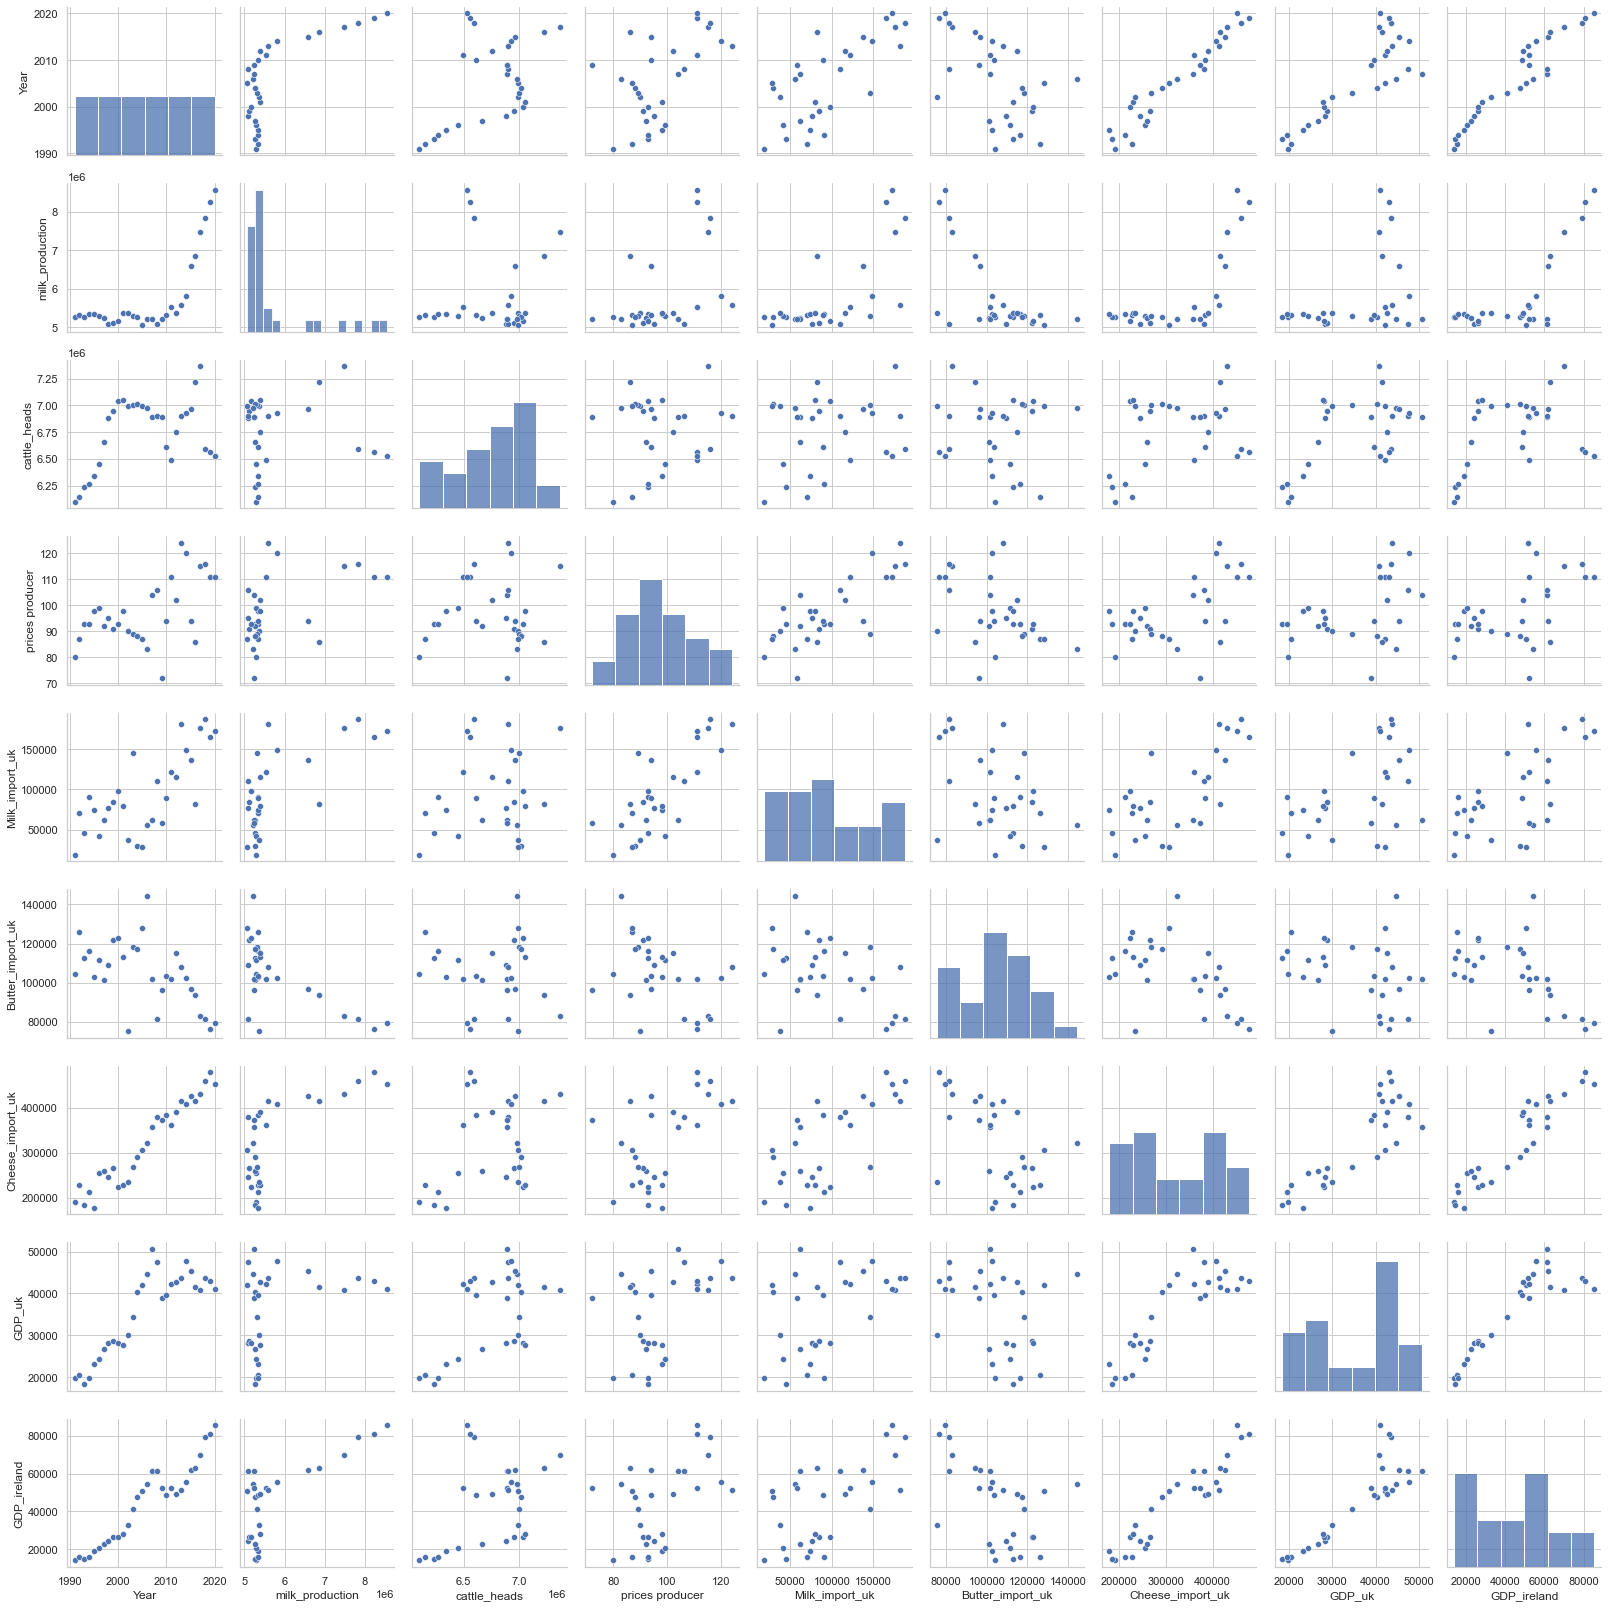

In [16]:
sns.set(style='whitegrid', context='notebook')

# Consider the following columns from the entire dataset
#cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# Display the pairplot using the above-mentioned columns
sns.pairplot(production_milk_ireland, height = 2.5)

plt.tight_layout()

# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

<AxesSubplot:>

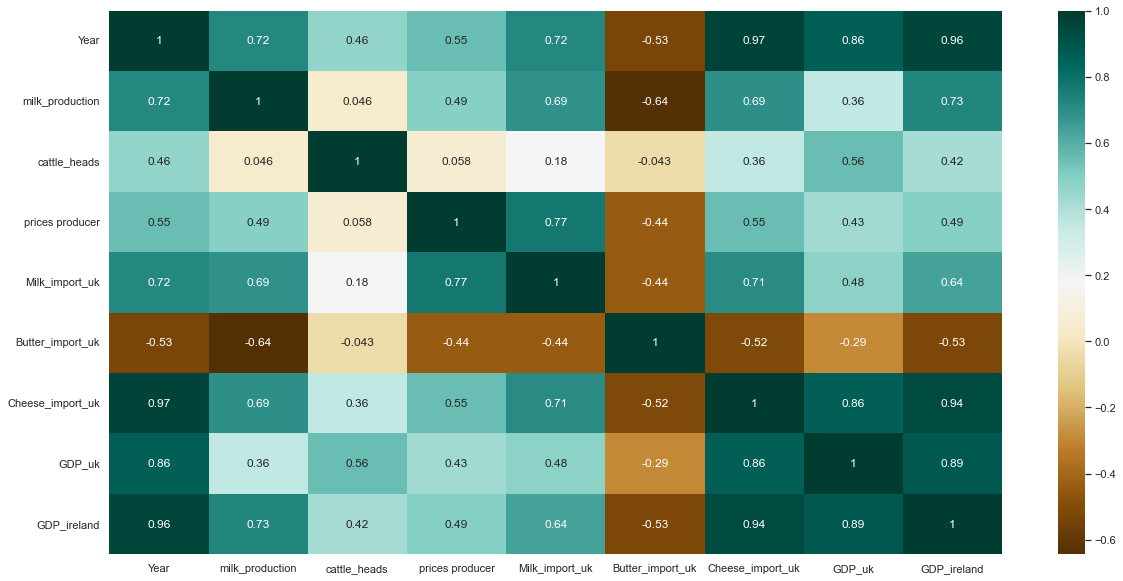

In [17]:
plt.figure(figsize=(20,10)) 
c = production_milk_ireland.corr()
sns.heatmap(c,cmap="BrBG",annot=True)


# Regression

In [18]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create X and y objects
X = production_milk_ireland[['Year', 'cattle_heads', 'prices producer', 'Milk_import_uk', 'Butter_import_uk', 'Cheese_import_uk', 'GDP_uk','GDP_ireland']]
y = production_milk_ireland['milk_production']


# Create Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, shuffle = True)


# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



 #Applying PCA function on trainingv and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 8) #min 5 7 are good 8 is the best result
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_



# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Display the training and test score
print(train_r2, test_r2)

# Plot result
#plt.plot(list(test_fcst))
#plt.plot(list(y_test))
#plt.xlabel('')
#plt.ylabel('')
#plt.show()
print(explained_variance)

0.9519459033136926 0.8744849041167101
[0.61352944 0.17012603 0.10188329 0.06093828 0.0355974  0.00967825
 0.00546103 0.00278629]


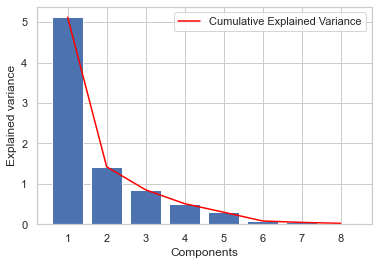

In [19]:
plt.bar(range(1,len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_,
         c = 'red',
         label = "Cumulative Explained Variance")
plt.legend(loc = 'best')

In [20]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [21]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002297,0.002583,0.000192,0.000383,0.0001,{'alpha': 0.0001},-292704.152750,-270895.325776,-229630.594483,-238130.500063,...,-250323.227611,27203.919002,5,-145504.359260,-132289.637761,-145752.809401,-137736.844680,-161316.466482,-144520.023517,9800.030868
1,0.000000,0.000000,0.000000,0.000000,0.001,{'alpha': 0.001},-292353.222398,-270581.202787,-229255.351996,-238297.192954,...,-250045.851982,27203.661465,4,-145372.879519,-132229.594125,-145813.016779,-137824.281297,-161320.395368,-144512.033418,9803.458457
2,0.000000,0.000000,0.000000,0.000000,0.01,{'alpha': 0.01},-289115.839444,-267476.959690,-225568.195033,-239934.582291,...,-247360.849353,27365.566370,3,-144082.426814,-131638.847465,-146480.585975,-138687.939812,-161354.187318,-144448.797477,9872.556893
3,0.006324,0.007745,0.000181,0.000362,0.05,{'alpha': 0.05},-290989.165284,-254437.669890,-221241.545956,-246615.876828,...,-241521.033079,32493.083885,1,-141361.141428,-131614.375557,-151004.716298,-143067.263181,-161399.501573,-145689.399607,9987.748652
4,0.003130,0.006260,0.000000,0.000000,0.1,{'alpha': 0.1},-293780.845544,-239661.103392,-255021.046173,-253805.693363,...,-244134.770033,37462.423002,2,-144717.242039,-132510.235258,-155755.869050,-150140.054833,-166377.927135,-149900.265663,11270.632714


In [22]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [23]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.tail(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
23,0.003124,0.006248,0.0,0.0,20,{'alpha': 20},-292617.046235,-270871.233688,-229516.493768,-238148.905073,...,-250234.927621,27240.816536,5,-145479.934578,-132276.441402,-145801.212085,-137744.617773,-161323.153380,-144525.071844,9805.298009
24,0.000000,0.000000,0.0,0.0,50,{'alpha': 50},-292427.121469,-270784.132786,-229282.658830,-238197.778830,...,-250054.772567,27297.511928,4,-145421.285139,-132246.593618,-145883.825733,-137767.486119,-161333.953418,-144530.628805,9814.415399
25,0.000000,0.000000,0.0,0.0,100,{'alpha': 100},-292112.415568,-270634.195467,-228892.967573,-238297.492339,...,-249758.566597,27391.068540,3,-145323.728393,-132196.838679,-146021.588722,-137813.930312,-161351.509509,-144541.519123,9828.833304
26,0.000000,0.000000,0.0,0.0,500,{'alpha': 500},-290510.152564,-269472.886161,-225775.174302,-239095.200414,...,-247577.721230,28506.428736,2,-144542.841004,-131798.871110,-147123.317332,-138185.483855,-161492.799847,-144628.662630,9967.425893
27,0.000000,0.000000,0.0,0.0,1000,{'alpha': 1000},-292298.883117,-268021.249529,-221877.875534,-240092.335506,...,-245612.654431,31185.786821,1,-143567.277792,-131932.482983,-148500.157780,-138649.925784,-161668.195632,-144863.607994,10031.181113


In [24]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 0.5).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.90


In [25]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=1000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.88
